In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sb
from plotter import *

In [2]:
path = 'simulations/uiuc/data_files/UIUC_CC30_52.sqlite'
path = 'simulations/uiuc/data_files/UIUC_LIMSOL_52.sqlite'
path = 'simulations/uiuc/data_files/**.sqlite'
files = glob.glob(path)
files.sort()
files
# conn = sqlite3.connect(path)

['simulations/uiuc/data_files/UIUC_UIUC_SLACK01_52.sqlite',
 'simulations/uiuc/data_files/UIUC_UIUC_SLACK05_52.sqlite',
 'simulations/uiuc/data_files/UIUC_UIUC_SLACK10_52.sqlite',
 'simulations/uiuc/data_files/UIUC_UIUC_SLACK20_52.sqlite']

In [10]:
def get_slack_value(fname):
    """
    Returns the slack value for a given filename
    """
    file = fname.split('/')[-1].strip('.sqlite')
    file = file.split('_')[-2]
    slack = int(file[-2:])

    return slack

In [11]:
get_slack_value(files[3])

20

In [26]:
def get_scenario_list(fname):
    """
    Returns list of scenario names
    """
    
    conn = sqlite3.connect(fname)
    cursor = conn.cursor()
    command = "SELECT scenario FROM Output_Objective"
    metadata = cursor.execute(command)
    scenarios = [i[0] for i in cursor.fetchall()]
        
    return scenarios

In [28]:
sc = get_scenario_list(files[0])

In [33]:
sc

['UIUC_SLACK01',
 'UIUC_SLACK01_mga_0',
 'UIUC_SLACK01_mga_1',
 'UIUC_SLACK01_mga_2',
 'UIUC_SLACK01_mga_3']

In [29]:
connector = sqlite3.connect(files[0])

In [30]:
get_annual_capacity(connector, 'UIUC', 'ELC', sc[0])

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM
year,,,,,,
2025,38.124114,50.000000,0.0,4.689867,16.960000,100.2554
2030,74.559167,66.273430,0.0,9.879456,24.644396,100.5000
2035,102.497800,78.404525,0.0,14.917116,40.723987,100.5000
2040,108.320480,98.752947,0.0,19.769040,48.188815,100.5000
2045,114.359280,98.752947,0.0,24.310352,52.384220,100.5000
2050,114.359280,115.475380,0.0,29.549293,57.177100,100.5000


In [32]:
get_annual_capacity(connector, 'UIUC', 'ELC', sc[1])

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM
year,,,,,,
2025,0.050677,53.863454,0.000000e+00,0.0,35.535715,100.5
2030,0.050677,56.820389,-1.995609e-07,0.0,40.943298,100.5
2035,0.050677,61.797091,-1.991300e-07,0.0,48.828980,100.5
2040,0.050677,74.500474,-7.968691e-08,0.0,52.926465,100.5
2045,0.050677,99.520141,0.000000e+00,0.0,56.562236,100.5
2050,0.050677,122.793030,0.000000e+00,0.0,63.424515,100.5


In [34]:
get_annual_generation(connector, 'UIUC', 'ELC', sc[1])

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM
year,,,,,,
2025,0.000339,163.975369,0.000000e+00,0.000000,56.643522,282.577078
2030,0.000356,180.187412,-4.181366e-07,0.000000,65.401874,282.766483
2035,0.000000,193.108209,-6.088813e-07,0.000000,77.632020,282.775710
2040,-0.000002,211.300504,-2.685108e-07,-0.000002,84.748865,282.624416
2045,0.000000,230.044385,-7.358165e-09,0.000000,91.022343,282.717114
2050,-0.000040,244.063728,0.000000e+00,-0.000017,102.197320,282.536095


In [36]:
all_frames = {}
for f in files:
    frames={}
    scenarios = get_scenario_list(f)
    connector = sqlite3.connect(f)
    sv = get_slack_value(f)
    for i,s in enumerate(scenarios):
        key = f'mga-{i}-{sv}%'
        frames[key] = get_annual_capacity(connector, 'UIUC', 'ELC', s)
    all_frames[sv] = frames

{1: {'mga-0-1%':        ABBOTT_TB     IMP_ELC  LI_BATTERY  NUCLEAR_TB  SOLAR_FARM  WIND_FARM
  year                                                                       
  2025   38.124114   50.000000         0.0    4.689867   16.960000   100.2554
  2030   74.559167   66.273430         0.0    9.879456   24.644396   100.5000
  2035  102.497800   78.404525         0.0   14.917116   40.723987   100.5000
  2040  108.320480   98.752947         0.0   19.769040   48.188815   100.5000
  2045  114.359280   98.752947         0.0   24.310352   52.384220   100.5000
  2050  114.359280  115.475380         0.0   29.549293   57.177100   100.5000,
  'mga-1-1%':       ABBOTT_TB     IMP_ELC    LI_BATTERY  NUCLEAR_TB  SOLAR_FARM  WIND_FARM
  year                                                                        
  2025   0.050677   53.863454  0.000000e+00         0.0   35.535715      100.5
  2030   0.050677   56.820389 -1.995609e-07         0.0   40.943298      100.5
  2035   0.050677   61.797091 -1

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.use("pgf")
plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"

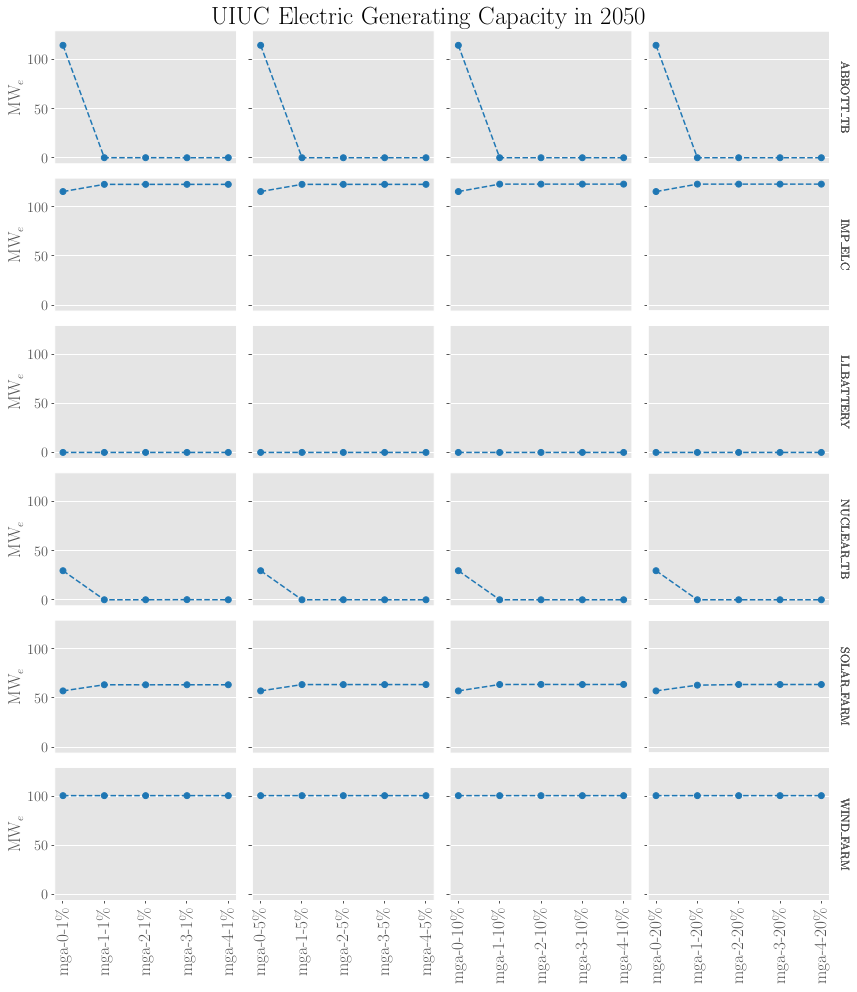

In [151]:
n_frames = len(all_frames)
n_techs = 6
fig, axes = plt.subplots(n_techs,n_frames,figsize=(12,14), sharex=False, sharey=True)

for j, key in enumerate(all_frames):
    val = all_frames[key]
    techs = val[list(val.keys())[0]].columns
    xticks = list(val.keys())
    for i, tech in enumerate(techs):
        data = [val[k][tech][2050] for k in val.keys()]
        axes[i][j].plot(xticks, data, linestyle='--', color='tab:blue', marker='o')
#         axes[i][j].set_ylim(-1,130)
        axes[i][j].grid(which='minor', linestyle='--', lw=0.5)
        axes[i][j].tick_params(axis='y', labelsize=14)
        if j == 0:
            axes[i][j].set_ylabel(r'MW$_e$', fontsize=16)
        if i < 5:
            axes[i][j].set_xticks([])
        ax2 = axes[i][n_frames-1].twinx()
        ax2.set_ylabel(tech, rotation=-90, labelpad=20)
        ax2.set_yticks([])
        ax2.tick_params(grid_alpha=0)
        ax2.minorticks_off()
#         axes[n_techs-1][j].set_xticks(xticks)
        axes[n_techs-1][j].tick_params(axis='x',rotation=90, labelsize=16, grid_alpha=0)
plt.suptitle('UIUC Electric Generating Capacity in 2050', fontsize=24)
# plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.tight_layout()
plt.savefig('thesis/figures/uiuc_elc_plot.pgf')

In [108]:
all_frames_stm = {}
for f in files:
    frames={}
    scenarios = get_scenario_list(f)
    connector = sqlite3.connect(f)
    sv = get_slack_value(f)
    for i,s in enumerate(scenarios):
        key = f'mga-{i}-{sv}%'
        frames[key] = get_annual_capacity(connector, 'UIUC', ['STM', 'NUC_STM'], s)
    all_frames_stm[sv] = frames

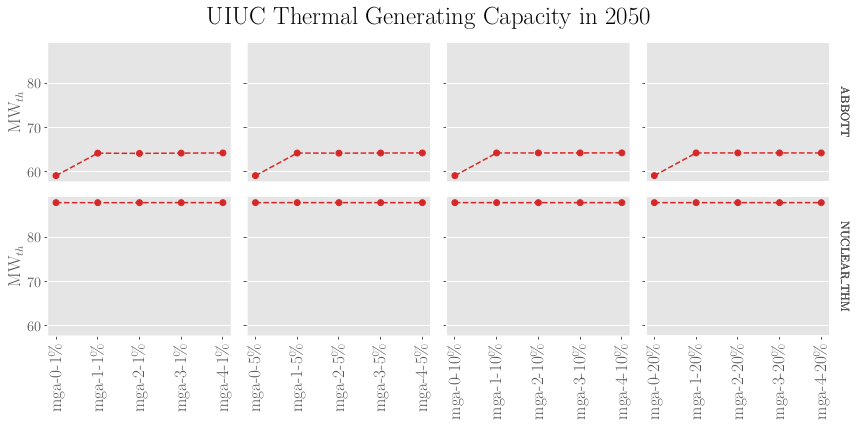

In [158]:
n_frames = len(all_frames_stm)
n_techs = 2
fig, axes = plt.subplots(n_techs,n_frames,figsize=(12,6), sharex=False, sharey=True)

for j, key in enumerate(all_frames_stm):
    val = all_frames_stm[key]
    techs = val[list(val.keys())[0]].columns
    xticks = list(val.keys())
    for i, tech in enumerate(techs):
        data = [val[k][tech][2050] for k in val.keys()]
        axes[i][j].plot(xticks, data, linestyle='--', color='tab:red', marker='o')
#         axes[i][j].set_ylim(-1,130)
        axes[i][j].grid(which='minor', linestyle='--', lw=0.5)
        axes[i][j].tick_params(axis='y', labelsize=14)
        if j == 0:
            axes[i][j].set_ylabel(r'MW$_{th}$', fontsize=16)
        if i < n_techs-1:
            axes[i][j].set_xticks([])
        ax2 = axes[i][n_frames-1].twinx()
        ax2.set_ylabel(tech, rotation=-90, labelpad=20)
        ax2.set_yticks([])
        ax2.tick_params(grid_alpha=0)
        ax2.minorticks_off()
#         axes[n_techs-1][j].set_xticks(xticks)
        axes[n_techs-1][j].tick_params(axis='x',rotation=90, labelsize=16, grid_alpha=0)
plt.suptitle('UIUC Thermal Generating Capacity in 2050', fontsize=24)
# plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.tight_layout()
plt.savefig('thesis/figures/uiuc_thermal_plot.pgf')

In [153]:
all_frames_chw = {}
for f in files:
    frames={}
    scenarios = get_scenario_list(f)
    connector = sqlite3.connect(f)
    sv = get_slack_value(f)
    for i,s in enumerate(scenarios):
        key = f'mga-{i}-{sv}%'
        frames[key] = get_annual_capacity(connector, 'UIUC', 'CHW', s)
    all_frames_chw[sv] = frames

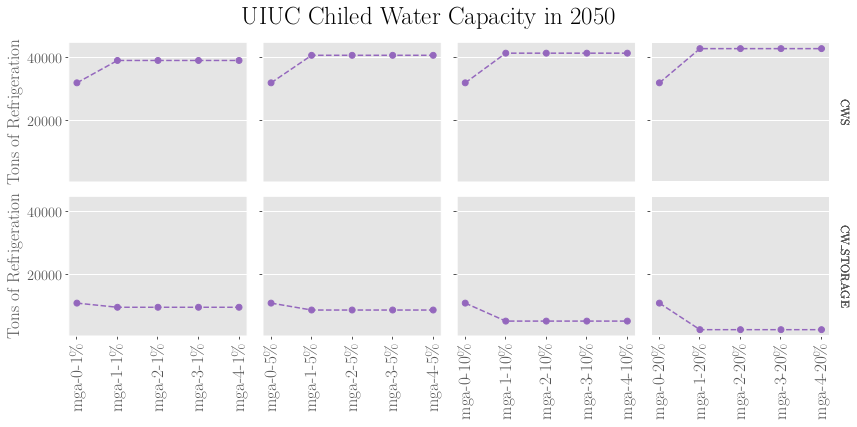

In [159]:
n_frames = len(all_frames_chw)
n_techs = 2
fig, axes = plt.subplots(n_techs,n_frames,figsize=(12,6), sharex=False, sharey=True)

for j, key in enumerate(all_frames_chw):
    val = all_frames_chw[key]
    techs = val[list(val.keys())[0]].columns
    xticks = list(val.keys())
    for i, tech in enumerate(techs):
        data = [val[k][tech][2050] for k in val.keys()]
        axes[i][j].plot(xticks, data, linestyle='--', color='tab:purple', marker='o')
#         axes[i][j].set_ylim(-1,130)
        axes[i][j].grid(which='minor', linestyle='--', lw=0.5)
        axes[i][j].tick_params(axis='y', labelsize=14)
        if j == 0:
            axes[i][j].set_ylabel(r'Tons of Refrigeration$', fontsize=16)
        if i < n_techs-1:
            axes[i][j].set_xticks([])
        ax2 = axes[i][n_frames-1].twinx()
        ax2.set_ylabel(tech, rotation=-90, labelpad=20)
        ax2.set_yticks([])
        ax2.tick_params(grid_alpha=0)
        ax2.minorticks_off()
#         axes[n_techs-1][j].set_xticks(xticks)
        axes[n_techs-1][j].tick_params(axis='x',rotation=90, labelsize=16, grid_alpha=0)
plt.suptitle('UIUC Chiled Water Capacity in 2050', fontsize=24)
# plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.tight_layout()
plt.savefig('thesis/figures/uiuc_chw_plot.pgf')

In [ ]:
all_frames

In [21]:
cursor = conn.cursor()
command = """SELECT DISTINCT scenario FROM Output_VFlow_Out"""
tab = cursor.execute(command)
scenarios = [s[0] for s in cursor.fetchall()]
scenarios

OperationalError: no such table: Output_VFlow_Out

In [22]:
place = "UIUC"
carrier = 'ELC'
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

elc_df = pd.concat(frames)
elc_df

OperationalError: no such table: time_periods

In [8]:
cap_tech_df = elc_df.drop(columns='SID')

<AxesSubplot:>

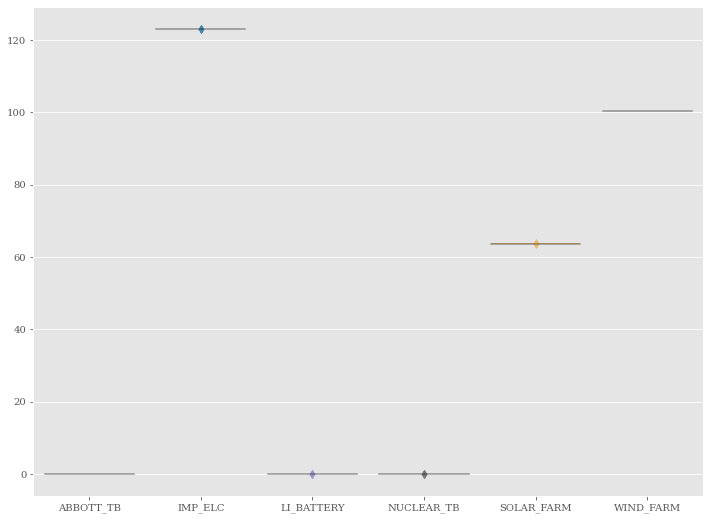

In [9]:
sb.boxenplot(data=cap_tech_df[cap_tech_df.index == 2050])

In [10]:
place = "UIUC"
carrier = ['STM', 'NUC_STM']
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

stm_df = pd.concat(frames)
stm_df.replace(12703.504000, np.nan, inplace=True)
stm_df

,ABBOTT,NUCLEAR_THM,SID
year,,,
2025,261.030000,20.055287,LIMSOL_mga_0
2030,261.030000,21.089465,LIMSOL_mga_0
2035,261.030000,22.066905,LIMSOL_mga_0
2040,156.618000,23.122270,LIMSOL_mga_0
2045,64.265840,44.883561,LIMSOL_mga_0
2050,64.265840,87.783647,LIMSOL_mga_0
2025,261.030000,20.068784,LIMSOL_mga_1
2030,261.030000,21.078882,LIMSOL_mga_1
2035,261.030000,22.082351,LIMSOL_mga_1


In [11]:
full_df = pd.concat([elc_df, stm_df], axis=1).drop_duplicates()
full_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM,SID,ABBOTT,NUCLEAR_THM,SID
year,,,,,,,,,,
2025,0.0,54.088815,0.000000e+00,-0.000007,35.684237,100.5,LIMSOL_mga_0,261.030000,20.055287,LIMSOL_mga_0
2030,0.0,57.056860,0.000000e+00,-0.000007,41.521799,100.5,LIMSOL_mga_0,261.030000,21.089465,LIMSOL_mga_0
2035,0.0,61.826504,0.000000e+00,-0.000007,49.872766,100.5,LIMSOL_mga_0,261.030000,22.066905,LIMSOL_mga_0
2040,0.0,74.429146,0.000000e+00,-0.000007,54.127992,100.5,LIMSOL_mga_0,156.618000,23.122270,LIMSOL_mga_0
2045,0.0,99.446750,0.000000e+00,-0.000007,58.099388,100.5,LIMSOL_mga_0,64.265840,44.883561,LIMSOL_mga_0
2050,0.0,123.018300,0.000000e+00,-0.000007,63.670625,100.5,LIMSOL_mga_0,64.265840,87.783647,LIMSOL_mga_0
2025,0.0,54.089094,0.000000e+00,0.000523,34.937716,100.5,LIMSOL_mga_1,261.030000,20.068784,LIMSOL_mga_1
2030,0.0,57.056959,0.000000e+00,0.000523,41.256831,100.5,LIMSOL_mga_1,261.030000,21.078882,LIMSOL_mga_1
2035,0.0,61.841231,0.000000e+00,0.000523,49.663180,100.5,LIMSOL_mga_1,261.030000,22.082351,LIMSOL_mga_1


full_df.replace(12703.504000, np.nan, inplace=True)

In [12]:
full_cap_df = full_df.drop(columns='SID')

<AxesSubplot:>

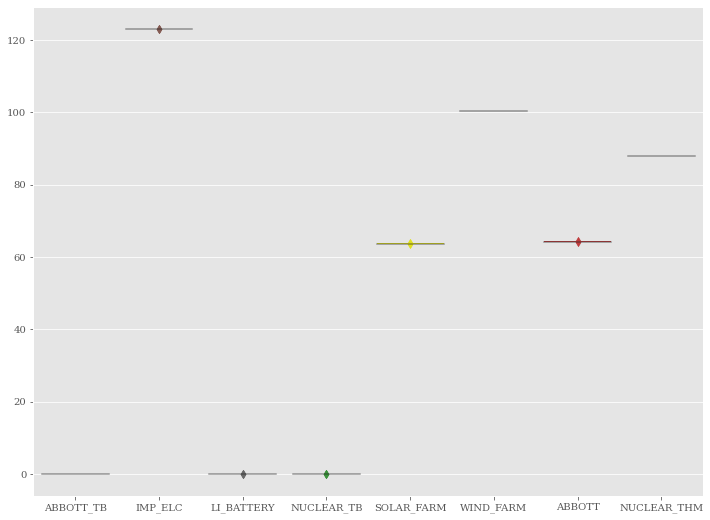

In [13]:
sb.boxenplot(data=full_cap_df[full_cap_df.index == 2050], palette=elc_colors)

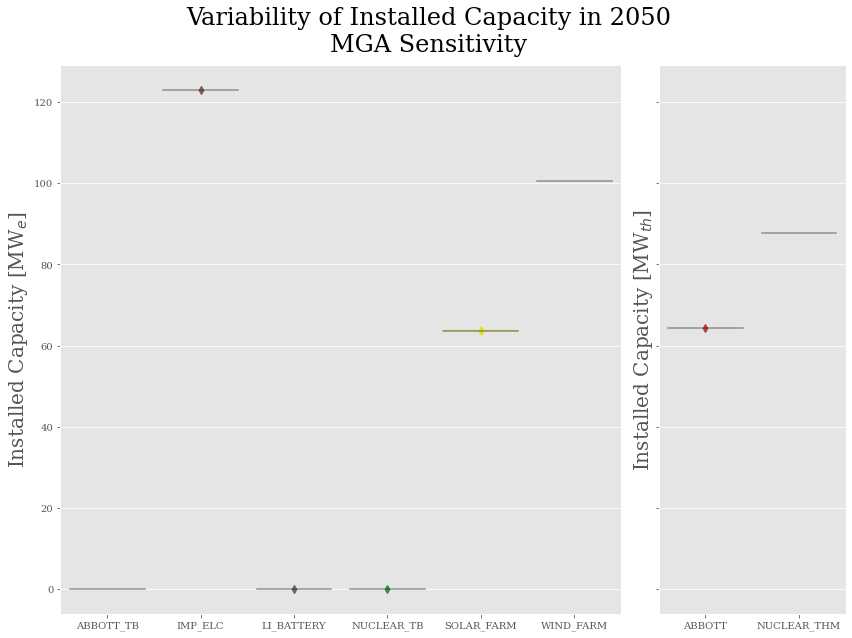

In [14]:
fig, axes = plt.subplots(1,2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})
sb.boxenplot(ax=axes[1], data=stm_df.drop(columns="SID").loc[2050], palette=elc_colors)
sb.boxenplot(ax=axes[0], data=elc_df.drop(columns="SID").loc[2050], palette=elc_colors)
axes[0].set_ylabel('Installed Capacity [MW$_e$]', fontsize=20)
axes[1].set_ylabel('Installed Capacity [MW$_{th}$]', fontsize=20)
plt.suptitle('Variability of Installed Capacity in 2050\nMGA Sensitivity', fontsize=24)
plt.tight_layout()

In [15]:
place = "UIUC"
carrier = 'CHW'
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

cw_df = pd.concat(frames)
cw_df.replace(12703.504000, np.nan, inplace=True)
cw_df

,CWS,CW_STORAGE,SID
year,,,
2025,26577.013,5249.3240,LIMSOL_mga_0
2030,29112.477,5249.3240,LIMSOL_mga_0
2035,31636.884,5249.3240,LIMSOL_mga_0
2040,34077.864,5249.3240,LIMSOL_mga_0
2045,36066.765,5249.3726,LIMSOL_mga_0
2050,41417.040,5249.3726,LIMSOL_mga_0
2025,26578.340,5248.0797,LIMSOL_mga_1
2030,29110.803,5248.2320,LIMSOL_mga_1
2035,31636.884,5248.2813,LIMSOL_mga_1


<AxesSubplot:>

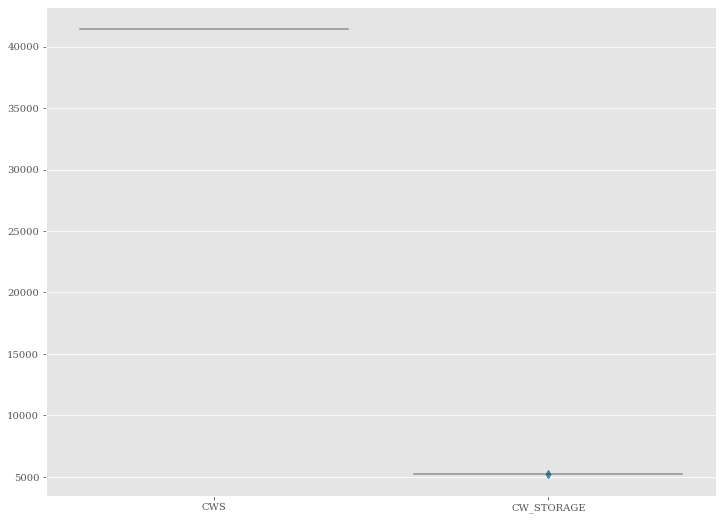

In [16]:
sb.boxenplot(data=cw_df.drop(columns='SID').loc[2050])

<AxesSubplot:xlabel='year'>

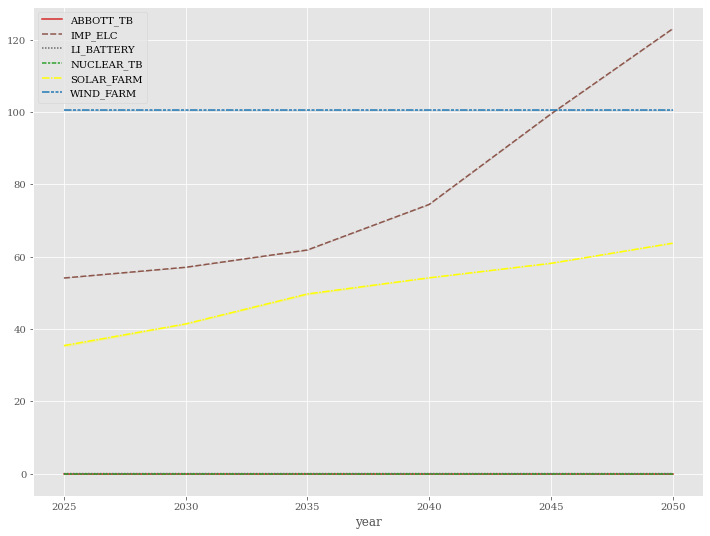

In [17]:
sb.lineplot(data=elc_df.drop(columns='SID'), palette=elc_colors)

In [18]:
v = list(elc_df.columns)
i = list(range(len(v)))
d = dict(zip(v,i))

sb.lineplot(x=elc_df['SID'],y=elc_df.iloc[d['SOLAR_FARM']], palette=elc_colors)

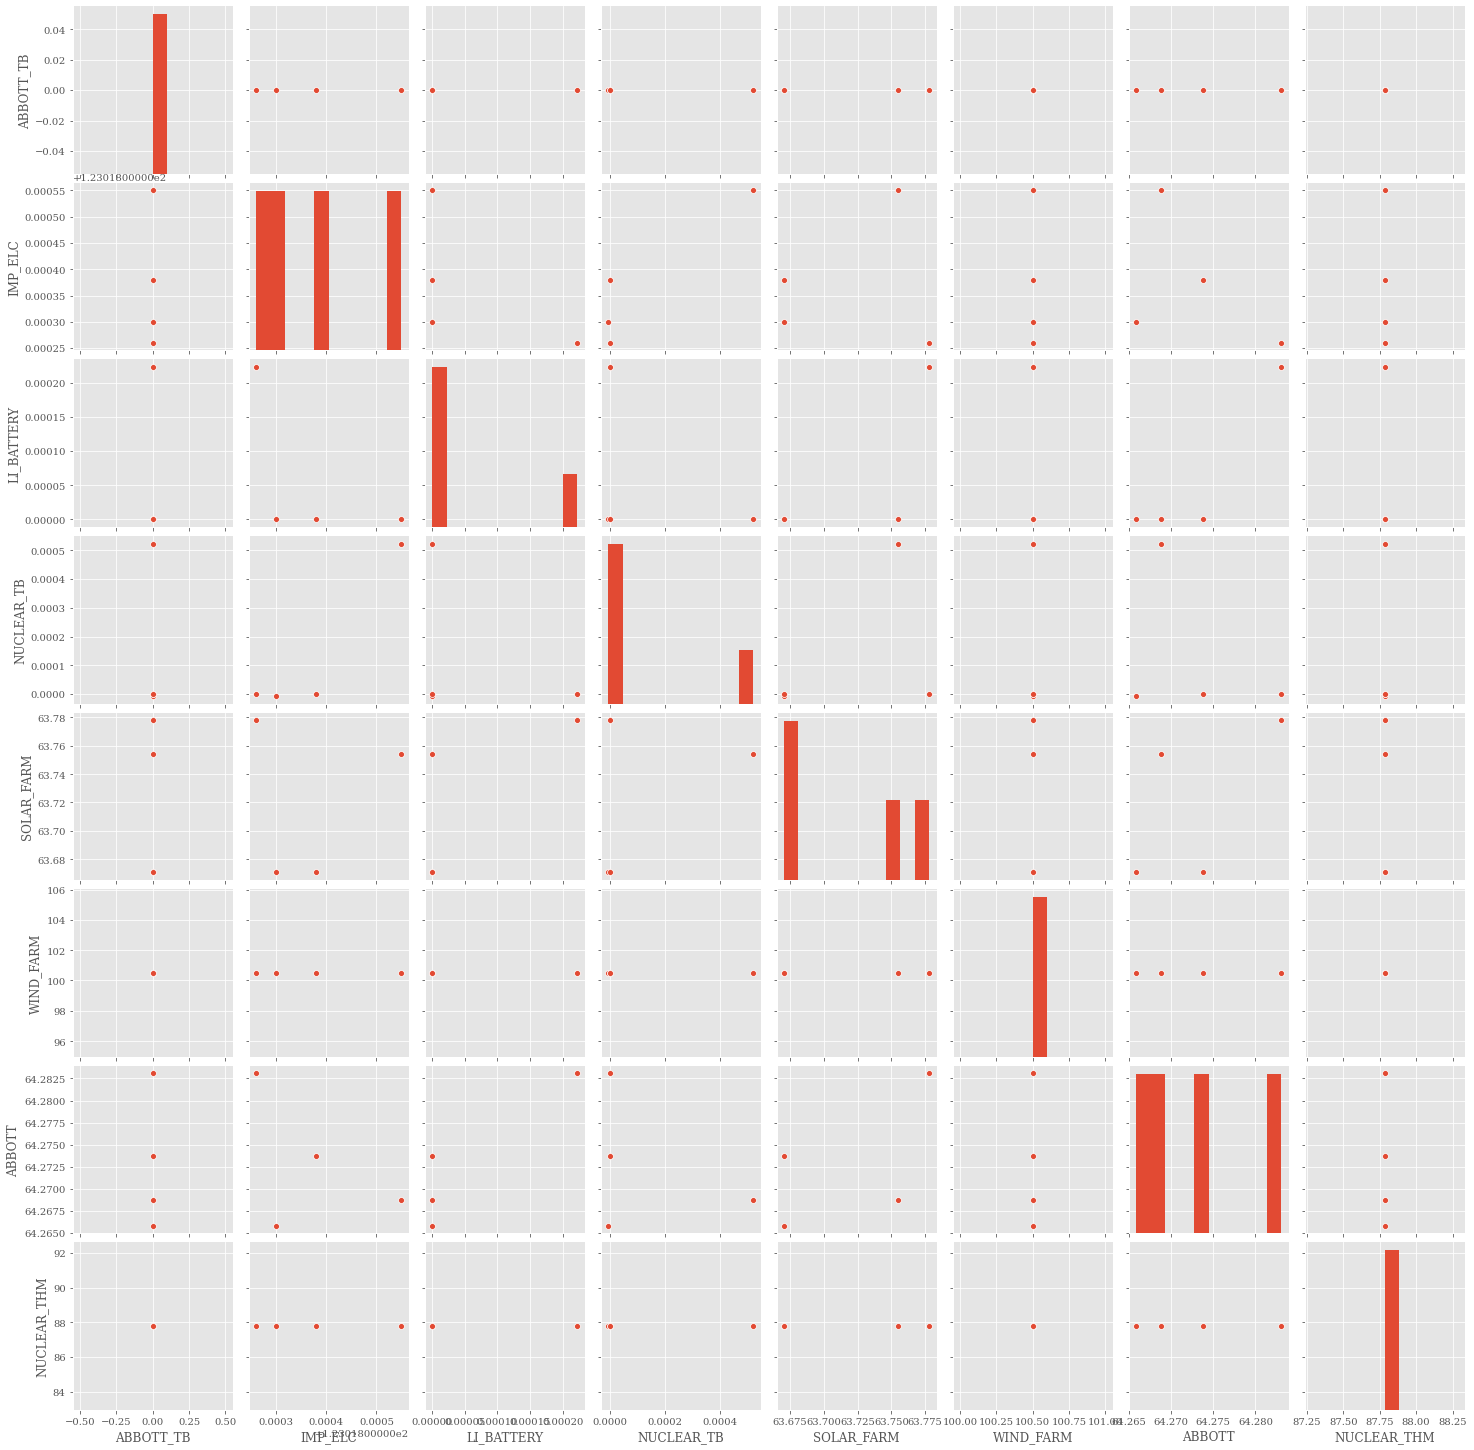

In [19]:
sb.pairplot(full_df.drop(columns='SID').groupby(elc_df.index).get_group(2050))